In [1]:
import pandas as pd 
import numpy as np

In [2]:
raw_data=pd.read_csv('./dat')

In [3]:
raw_data

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,RENTGRS,PERNUM,...,SEX,AGE,MARST,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD,OCC,IND,INCTOT
0,2019,201901,1,2019010000088,11.0,2019000000011,220001,4,0,1,...,1,39,6,0,0,0,0,0,0,9000
1,2019,201901,2,2019010000096,70.0,2019000000021,100001,3,0,1,...,2,21,6,0,0,0,0,0,0,150
2,2019,201901,3,2019010000153,20.0,2019000000031,110001,4,0,1,...,1,19,6,6,60,0,0,5240,9160,1400
3,2019,201901,4,2019010000198,79.0,2019000000041,110001,3,0,1,...,1,77,5,0,0,0,0,0,0,22700
4,2019,201901,5,2019010000205,53.0,2019000000051,270101,3,0,1,...,1,41,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239548,2019,201901,1428035,2019001411842,29.0,2019014280351,50056,1,0,1,...,2,63,5,0,0,0,0,5150,580,117000
3239549,2019,201901,1428035,2019001411842,29.0,2019014280351,50056,1,0,2,...,1,45,4,0,0,0,0,9620,4795,14000
3239550,2019,201901,1428036,2019001412021,51.0,2019014280361,20056,1,0,1,...,2,85,5,0,0,0,0,0,0,18500
3239551,2019,201901,1428037,2019001412362,65.0,2019014280371,50056,1,0,1,...,2,67,1,0,0,23,2309,0,0,49900


In [6]:
raw_data=raw_data.drop_duplicates(subset=['SERIAL'])

In [7]:
raw_data=raw_data.loc[raw_data['INCTOT']>=0]

In [8]:
raw_data=raw_data.loc[raw_data['AGE']>=18]
raw_data

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,RENTGRS,PERNUM,...,SEX,AGE,MARST,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD,OCC,IND,INCTOT
0,2019,201901,1,2019010000088,11.0,2019000000011,220001,4,0,1,...,1,39,6,0,0,0,0,0,0,9000
1,2019,201901,2,2019010000096,70.0,2019000000021,100001,3,0,1,...,2,21,6,0,0,0,0,0,0,150
2,2019,201901,3,2019010000153,20.0,2019000000031,110001,4,0,1,...,1,19,6,6,60,0,0,5240,9160,1400
3,2019,201901,4,2019010000198,79.0,2019000000041,110001,3,0,1,...,1,77,5,0,0,0,0,0,0,22700
4,2019,201901,5,2019010000205,53.0,2019000000051,270101,3,0,1,...,1,41,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239537,2019,201901,1428033,2019001410371,14.0,2019014280331,40056,1,0,1,...,1,33,1,0,0,49,4901,110,9370,75000
3239546,2019,201901,1428034,2019001411359,56.0,2019014280341,50056,1,0,1,...,1,75,1,0,0,0,0,0,0,57700
3239548,2019,201901,1428035,2019001411842,29.0,2019014280351,50056,1,0,1,...,2,63,5,0,0,0,0,5150,580,117000
3239550,2019,201901,1428036,2019001412021,51.0,2019014280361,20056,1,0,1,...,2,85,5,0,0,0,0,0,0,18500


In [9]:
## RENTGRS: Monthly gross rent
## PERWT: person weight
## SEX: Male 1 Female 2
## AGE: 1-135
## MARST: 1                   Married, spouse present
#        2                   Married, spouse absent
#        3                   Separated
#        4                   Divorced
#        5                   Widowed
#        6                   Never married/single
## GRADEATT: Grade level attending
## DEGFIELDD: Field of degree
## INCTOT: Total personal income
## OCC: occupation
## IND: industry
data=raw_data.drop(['YEAR','SAMPLE', 'SERIAL','CBSERIAL', 'HHWT',
                    'GRADEATTD','GQ','CLUSTER', 'STRATA',
                   'DEGFIELD','PERNUM'],axis=1)

data=data.sample(n=50000,replace=False,random_state=1)
data

,RENTGRS,PERWT,SEX,AGE,MARST,GRADEATT,DEGFIELDD,OCC,IND,INCTOT
1489296,0,23.0,1,72,4,0,0,0,0,136700
1990428,0,81.0,1,53,6,0,0,9620,6380,6750
1281251,0,123.0,1,62,1,0,0,4340,8562,40000
2387470,0,39.0,2,95,5,0,0,0,0,87100
1571857,0,78.0,2,60,1,0,6203,700,7080,53000
...,...,...,...,...,...,...,...,...,...,...
1669839,0,29.0,2,60,5,0,0,340,8290,34000
2644397,0,100.0,2,64,1,0,0,0,0,60
805610,0,340.0,1,74,1,0,0,0,0,19200
2690268,0,87.0,1,44,6,0,0,4700,8680,48000


In [15]:
data1=data.copy()
data1.columns

Index(['RENTGRS', 'PERWT', 'SEX', 'AGE', 'MARST', 'GRADEATT', 'DEGFIELDD',
       'OCC', 'IND', 'INCTOT'],
      dtype='object')

# Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='SEX', ylabel='INCTOT'>

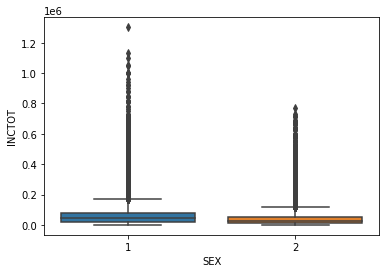

In [18]:
sns.boxplot(x="SEX", y="INCTOT", data=data)

<AxesSubplot:xlabel='MARST', ylabel='INCTOT'>

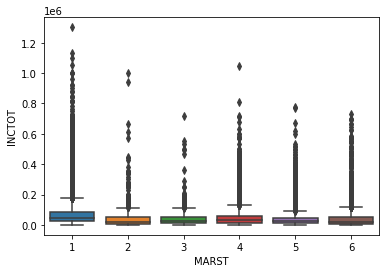

In [19]:
sns.boxplot(x="MARST", y="INCTOT", data=data)

<AxesSubplot:xlabel='GRADEATT', ylabel='INCTOT'>

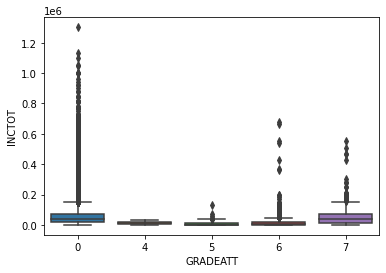

In [21]:
sns.boxplot(x='GRADEATT', y="INCTOT", data=data)

(array([25716.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24284.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

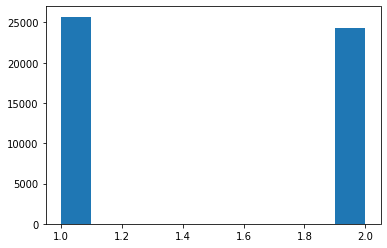

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing.label import _encode

In [176]:
## Correlation Matrix

cormat = data.corr()
round(cormat,2)

,RENTGRS,PERWT,SEX,AGE,MARST,GRADEATT,DEGFIELDD,OCC,IND,INCTOT
RENTGRS,1.00,0.16,0.00,-0.17,0.14,0.06,0.01,0.03,0.05,0.06
PERWT,0.16,1.00,-0.00,-0.14,0.10,0.04,-0.03,0.03,0.00,0.07
SEX,0.00,-0.00,1.00,0.05,-0.01,0.00,0.02,-0.12,0.07,-0.02
AGE,-0.17,-0.14,0.05,1.00,-0.55,-0.49,0.18,0.07,0.10,-0.66
MARST,0.14,0.10,-0.01,-0.55,1.00,0.42,-0.24,-0.15,-0.23,0.47
GRADEATT,0.06,0.04,0.00,-0.49,0.42,1.00,-0.15,-0.12,-0.12,0.32
DEGFIELDD,0.01,-0.03,0.02,0.18,-0.24,-0.15,1.00,-0.05,0.28,-0.24
OCC,0.03,0.03,-0.12,0.07,-0.15,-0.12,-0.05,1.00,0.49,-0.40
IND,0.05,0.00,0.07,0.10,-0.23,-0.12,0.28,0.49,1.00,-0.48
INCTOT,0.06,0.07,-0.02,-0.66,0.47,0.32,-0.24,-0.40,-0.48,1.00


 ### Correlation matrix to heat map; The primary concept of heatmaps is to 
###  replace numbers with colours of varied hues, as illustrated by the scale below. 
###   This style of depiction, as opposed to a table of data, 
### can make it much easier to identify linear correlations between variables.
### From this map, we can see that MARST and GRADEATT have the largest 
### positive correlation with INCTOT whereas AGE has the largest negative correlation 
### with INCTOT


<AxesSubplot:>

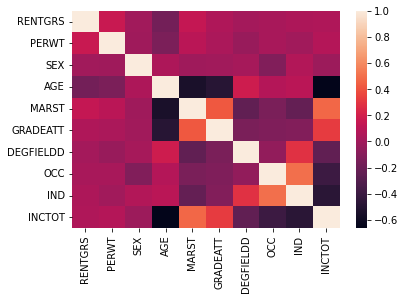

In [385]:

sns.heatmap(cormat)

In [178]:
data['INCTOT']=np.log(data['INCTOT'])

<AxesSubplot:xlabel='AGE', ylabel='INCTOT'>

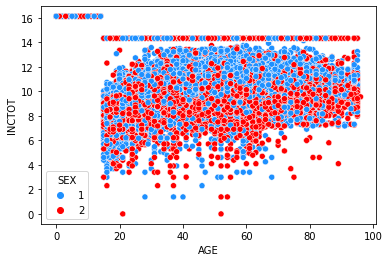

In [179]:
sns.scatterplot(data=data, x="AGE", y="INCTOT", hue="SEX",
               palette=['dodgerblue','red'], legend='full')

<AxesSubplot:xlabel='AGE', ylabel='INCTOT'>

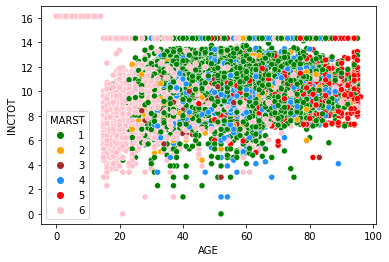

In [180]:
sns.scatterplot(data=data, x="AGE", y="INCTOT", hue="MARST",
               palette=['green','orange','brown','dodgerblue','red','pink'])

<AxesSubplot:xlabel='SEX', ylabel='INCTOT'>

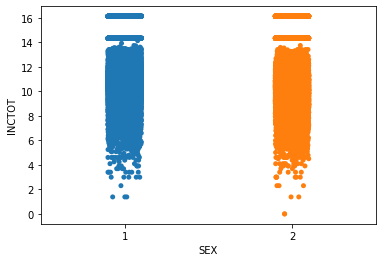

In [181]:
sns.stripplot(x="SEX", y="INCTOT", data=data)

<AxesSubplot:xlabel='MARST', ylabel='INCTOT'>

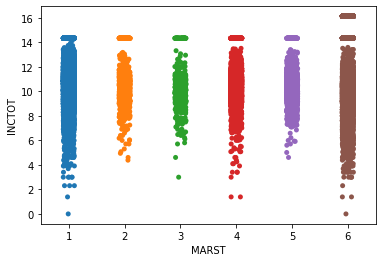

In [182]:
sns.stripplot(x="MARST", y="INCTOT", data=data)

<AxesSubplot:xlabel='GRADEATT', ylabel='INCTOT'>

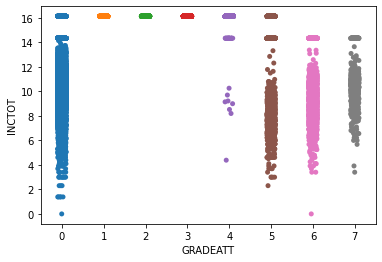

In [183]:
sns.stripplot(x="GRADEATT", y="INCTOT", data=data)

<AxesSubplot:xlabel='SEX', ylabel='INCTOT'>

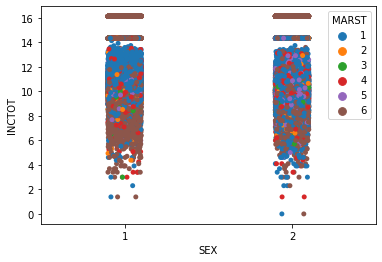

In [184]:
 sns.stripplot(x="SEX", y="INCTOT", hue="MARST", data=data)

# Standardize the data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
scaler.fit(data)

StandardScaler()

In [30]:
scaled_data=scaler.transform(data)

inputs=scaled_data[:,:-1]
income=scaled_data[:,-1]


In [31]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [32]:
x_train,x_test,y_train,y_test=train_test_split(inputs,income,test_size=0.2,random_state=20)

## Support Vector Machine

In [65]:
 from sklearn import svm
from sklearn import metrics

In [74]:
mod1=svm.SVR(kernel="poly")

In [75]:
mod1.fit(x_train,y_train)

SVR(kernel='poly')

In [76]:
pred1=mod1.predict(x_test)

In [77]:
r2_score(y_test,pred1)

0.14308479612239255

In [356]:
errors = list()
for i in range(len(y_test)):
	# calculate error
	err = (pred1[i] - y_test[i])**2
	# store error
	errors.append(err)

np.sum(errors)

846.1385117701066

# Decision Tree

In [78]:
from sklearn import tree

In [87]:
mod2=tree.DecisionTreeRegressor(max_depth=10)

In [88]:
mod2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [89]:
pred2=mod2.predict(x_test)

In [90]:
r2_score(y_test,pred2)

0.2489387269997564

In [361]:
errors = list()
for i in range(len(y_test)):
	# calculate error
	err = (pred2[i] - y_test[i])**2
	# store error
	errors.append(err)

np.sum(errors)

204.16236066713537

# Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
mod3=LinearRegression()

In [35]:
mod3.fit(x_train,y_train)

LinearRegression()

In [40]:
 from sklearn.metrics import r2_score

In [41]:
pred3=mod3.predict(x_test)

In [42]:
r2_score(y_test,pred3)

0.17345450511990756

In [92]:
errors = list()
for i in range(len(y_test)):
	# calculate error
	err = (pred3[i] - y_test[i])**2
	# store error
	errors.append(err)
np.sum(errors)/50000

0.17616982602341566

In [37]:
feature_name=predictors.columns.values
summary_table=pd.DataFrame(columns=['FeatureName'],data=feature_name)
summary_table['Coefficients']=np.transpose(mod3.coef_)
summary_table

NameError: name 'predictors' is not defined

## Results

### When we compare the SVM and Decision tree models, we can observe 
### that the Decision tree outperforms the SVM in forecasting income given the predictor variables.
### Because the decision tree model's sum squared residuals are substantially less.

### Looking at the results of the linear regression model, we can see that age was
### the most important factor in predicting income. Furthermore, the factors occupation and 
### industry have an impact on income. However, there is little wage disparity between genders.


In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
mod4=KNeighborsRegressor(n_neighbors=9)

In [62]:
mod4.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [63]:
pred4=mod4.predict(x_test)

In [64]:
r2_score(y_test,pred4)

0.20098404992851093